In [1]:
from coalition_forming import *

In [2]:
party_seats = pd.Series({
    'Kahol Lavan': 33,
    'Likud': 32,
    'Joint List': 13,
    'Shas': 9,
    'Yisrael Beitenu': 8,
    'United Torah Judaism': 7,
    'Yamina': 7,
    'Labour-Gesher': 6,
    'Democratic Union': 5
})
assert (sum(party_seats) == 120)
parties = set(party_seats.index)

In [3]:
possible_partners = {
    'Kahol Lavan': {'Joint List', 'Democratic Union', 'Labour-Gesher', 'Yisrael Beitenu'},
    'Likud': {'Yisrael Beitenu', 'Shas', 'United Torah Judaism', 'Yamina'},
    'Joint List': {'Labour-Gesher','Democratic Union'},
    'Shas': {'Yamina', 'United Torah Judaism', 'Labour-Gesher'},
    'Yisrael Beitenu': {'Labour-Gesher'},
    'United Torah Judaism': {'Yamina', 'Labour-Gesher'},
    'Labour-Gesher': {'Democratic Union'},
    'Yamina': set(),
    'Democratic Union': set(),
}

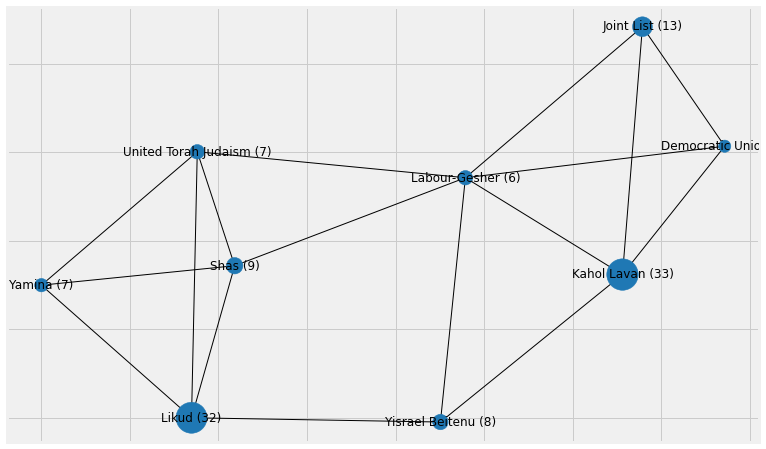

In [4]:
plot_cooperation_network(possible_partners, party_seats)

In [5]:
coalitions_df = create_coalitions(possible_partners, party_seats, only_maximal=False, only_valid=True)
coalitions_df

,members,value,necessary_parties


,members,value,necessary_parties,necessary_are_sufficient
0,"{Yisrael Beitenu, Likud, Labour-Gesher, Kahol ...",79,"{Likud, Kahol Lavan}",True


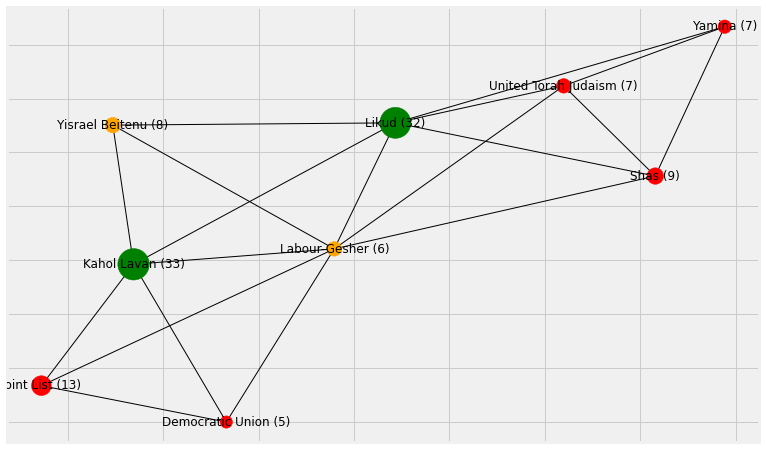

In [6]:
# increase possible coalitions: Unity government
possible_partners.update({'Kahol Lavan': possible_partners['Kahol Lavan'].union({'Likud'})})
possible_partners.update({'Likud': possible_partners['Likud'].union({'Labour-Gesher'})})

coalitions_df = create_coalitions(possible_partners, party_seats, only_maximal=True, only_valid=True)
#plot_cooperation_network(possible_partners)
plot_possible_coalitions(possible_partners, coalitions_df, party_seats)
coalitions_df

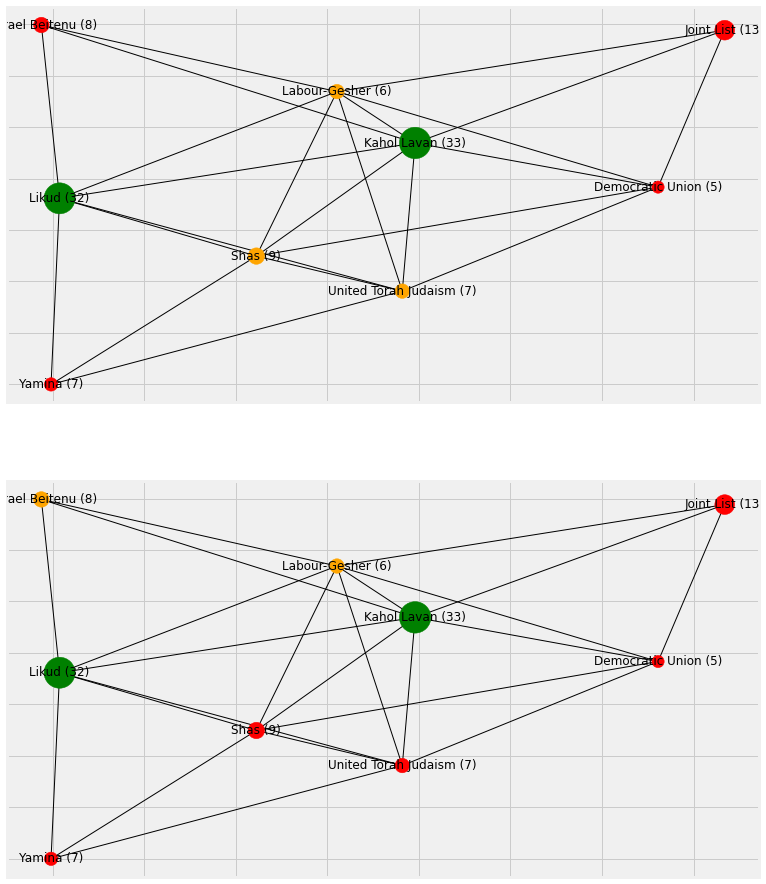

In [7]:
# increase possible coalitions:
# # Kahol Lavan with Ultra-Orthodox

possible_partners.update({'Kahol Lavan': possible_partners['Kahol Lavan'].union({'Shas', 'United Torah Judaism'})})
possible_partners.update({'Shas': possible_partners['Shas'].union({'Democratic Union'})})
possible_partners.update({'United Torah Judaism': possible_partners['United Torah Judaism'].union({'Democratic Union'})})


coalitions_df = create_coalitions(possible_partners, party_seats, only_maximal=True, only_valid=True)
plot_possible_coalitions(possible_partners,coalitions_df, party_seats)

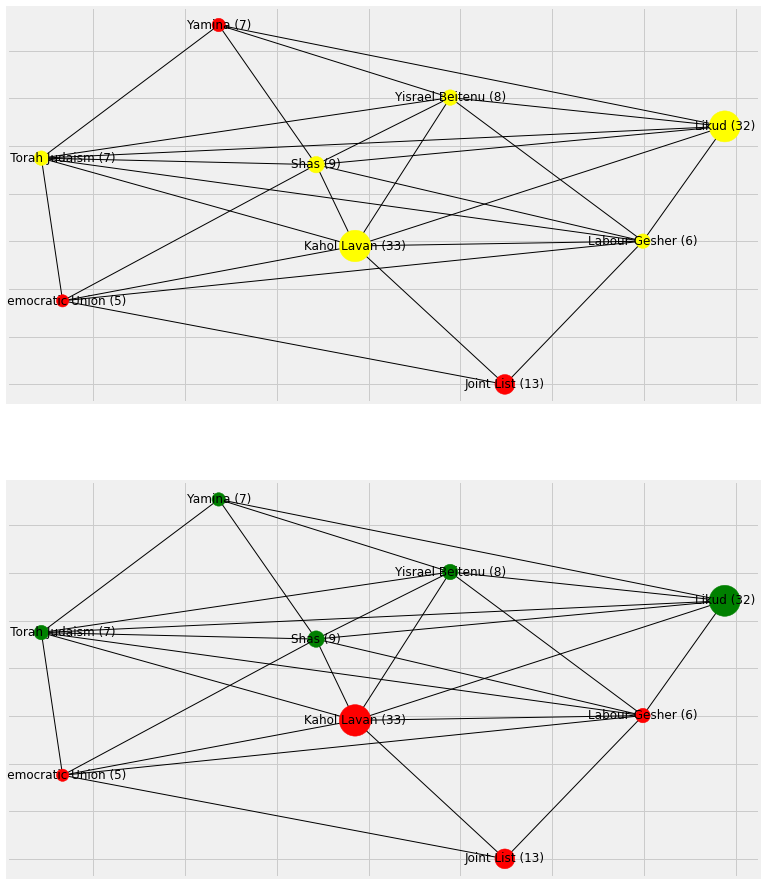

In [8]:
# increase possible coalitions:
# # Yisrael Beitenu with Ultra-Orthodox

possible_partners.update({'Yisrael Beitenu': possible_partners['Yisrael Beitenu'].union(
    {'Shas', 'United Torah Judaism', 'Yamina'})})

coalitions_df = create_coalitions(possible_partners, party_seats, only_maximal=True, only_valid=True)
plot_possible_coalitions(possible_partners,coalitions_df, party_seats)

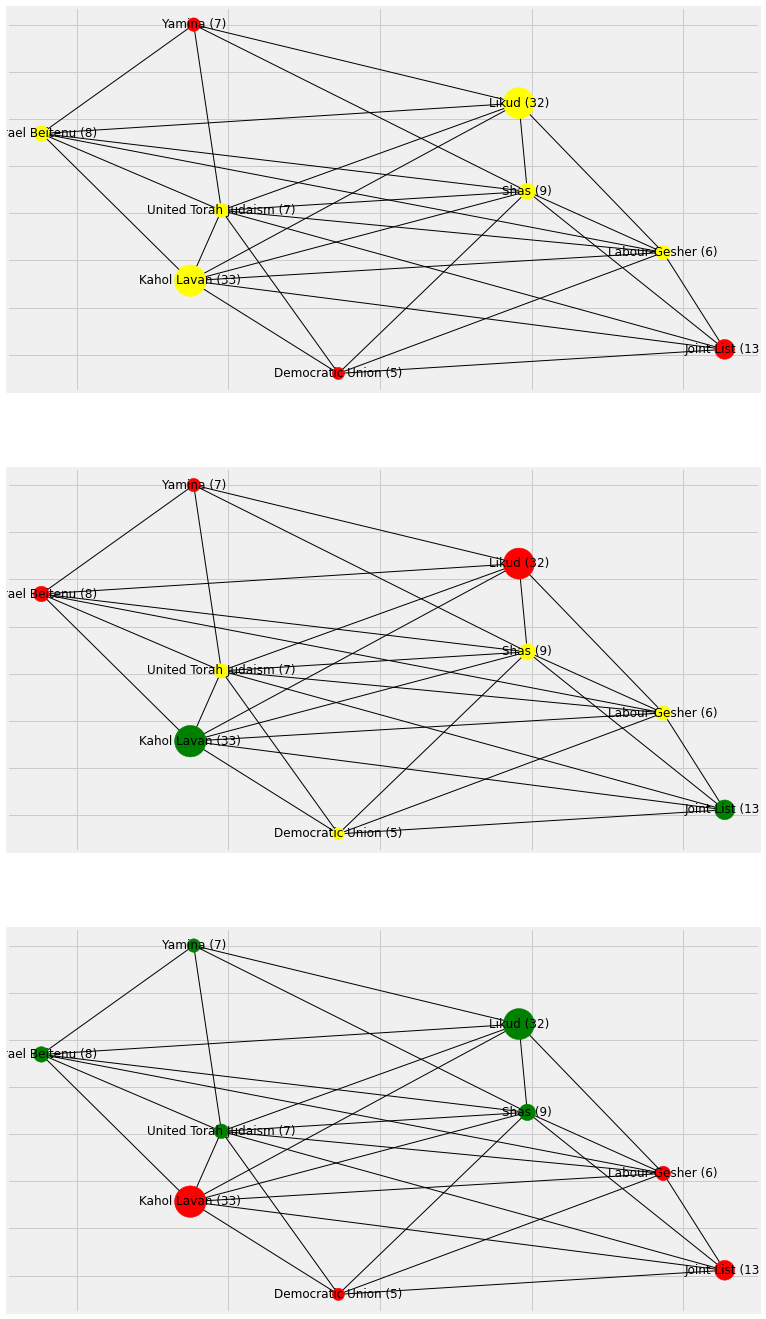

In [9]:
# increase possible coalitions:
# # Joint List with Ultra-Orthodox

possible_partners.update({'Joint List': possible_partners['Joint List'].union(
    {'Shas', 'United Torah Judaism'})})

coalitions_df = create_coalitions(possible_partners, party_seats, only_maximal=True, only_valid=True)
plot_possible_coalitions(possible_partners,coalitions_df, party_seats)